In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pprint import pprint

# magic to import packages from parent directory
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

from src.tree_boosting import TreeBoosting
from src import utils 

%load_ext autoreload
%autoreload 2

In [18]:
tree = TreeBoosting(1, verbose=False)

X, y = utils.convert_to_3day_mean_format(utils.load_artembev(), add_day_numbers=True)

X.head()

,TRIMP1_mean_3_days,TRIMP2_mean_3_days,TRIMP3_mean_3_days,TRIMP4_mean_3_days,PhC_mean_3_days,day_number
12,994.960748,103.188621,1260.987536,758.520146,0.395014,2
13,997.482226,61.388053,1853.448052,1052.005165,0.393683,3
14,770.478993,36.772901,1997.440934,1154.630564,0.393683,4
15,981.762669,177.930531,1626.721428,784.579500,0.400398,5
16,958.164133,173.953128,1848.569418,1049.974340,0.408444,6


In [19]:
days = X['day_number']
X.drop(columns=['day_number'], inplace=True)

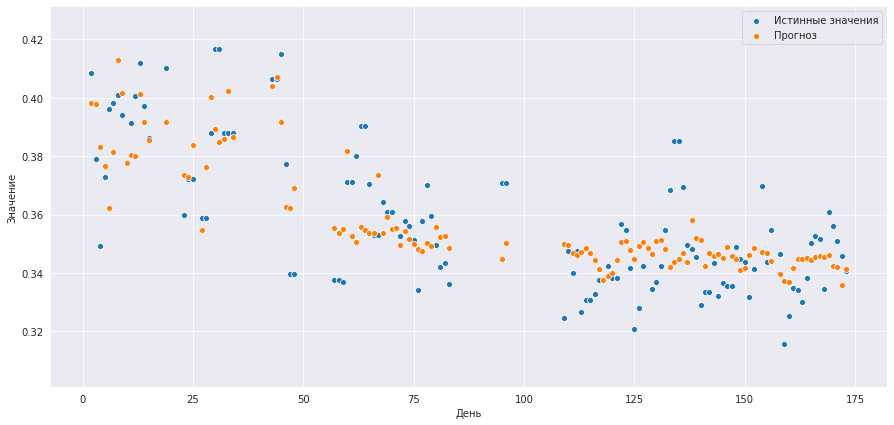

In [20]:
tree.fit(X, y)

y_pred = tree.predict(X)

plt.figure(figsize=(15,7))
sns.scatterplot(days, y, label="Истинные значения")
sns.scatterplot(days, y_pred, label='Прогноз')
sns.set_style("darkgrid")
plt.xlabel('День')
_ = plt.ylabel('Значение')

In [5]:
X.head()

,TRIMP1_mean_3_days,TRIMP2_mean_3_days,TRIMP3_mean_3_days,TRIMP4_mean_3_days,PhC_mean_3_days
12,994.960748,103.188621,1260.987536,758.520146,0.395014
13,997.482226,61.388053,1853.448052,1052.005165,0.393683
14,770.478993,36.772901,1997.440934,1154.630564,0.393683
15,981.762669,177.930531,1626.721428,784.579500,0.400398
16,958.164133,173.953128,1848.569418,1049.974340,0.408444


In [6]:
print(tree.linears[0].coef_, tree.linears[0].intercept_)
print()
print(tree.linears[1].coef_, tree.linears[1].intercept_)
print()
print(tree.possible_values)

[ 1.61251331e-05 -1.91849390e-05 -2.78488669e-06 -1.55739360e-06
  1.55777281e-02] 0.34498563244074293

[ 7.13415185e-05 -2.01186687e-04 -3.43102787e-06 -2.67494070e-05
 -6.89149890e-01] 0.6447323185418876

[0.34762989 0.3857547 ]


In [8]:
X1 = X.drop(columns=['day_number'])
classes = tree.tree.predict(X1)

classes_and_days = np.vstack((classes, X['day_number']))


classes_and_days[1][classes_and_days[0] == np.max(classes_and_days[0])]

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 19., 23., 24., 25., 28., 29., 30., 31., 32., 33., 34., 43.,
       44., 45., 46., 47., 48., 60., 67.])

In [9]:
# from sklearn.tree import export_graphviz
# export_graphviz(tree.tree, './tree_hybrid_2020_06_04.dot')

In [22]:
prok, volkov = utils.load_others()

x2, y2 = utils.convert_to_3day_mean_format(prok, add_day_numbers=True)
x3, y3 = utils.convert_to_3day_mean_format(volkov, add_day_numbers=True)

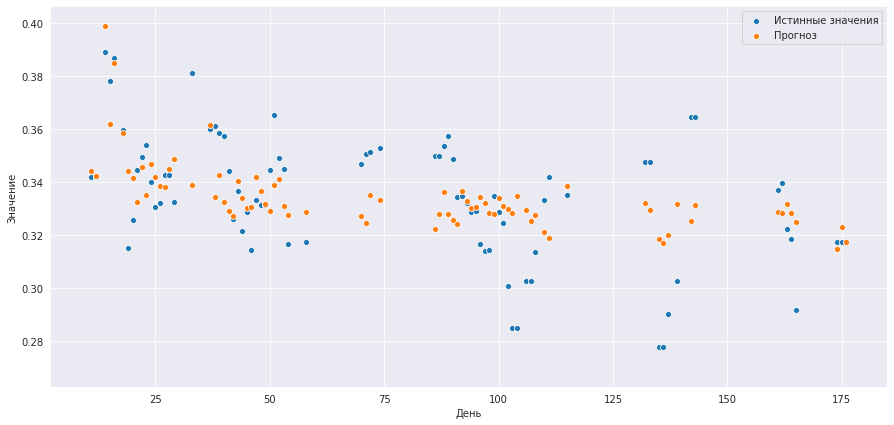

In [23]:
days = x2['day_number']
x2.drop(columns=['day_number'], inplace=True)

tree = TreeBoosting(1)

tree.fit(x2, y2)

y_pred = tree.predict(x2)

plt.figure(figsize=(15,7))
sns.scatterplot(days, y2, label="Истинные значения")
sns.scatterplot(days, y_pred, label='Прогноз')
sns.set_style("darkgrid")
plt.xlabel('День')
_ = plt.ylabel('Значение')

In [25]:
# X1 = X.drop(columns=['day_number'])
classes = tree.tree.predict(x2)

classes_and_days = np.vstack((classes, days[x2.index]))


classes_and_days[1][classes_and_days[0] == np.max(classes_and_days[0])]

array([ 11.,  12.,  19.,  20.,  21.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,  33.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  70.,  71.,  72.,
        74.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 106., 107.,
       108., 110., 111., 115., 132., 133., 135., 136., 137., 139., 142.,
       143., 161., 162., 163., 164., 165., 174., 175., 176.])

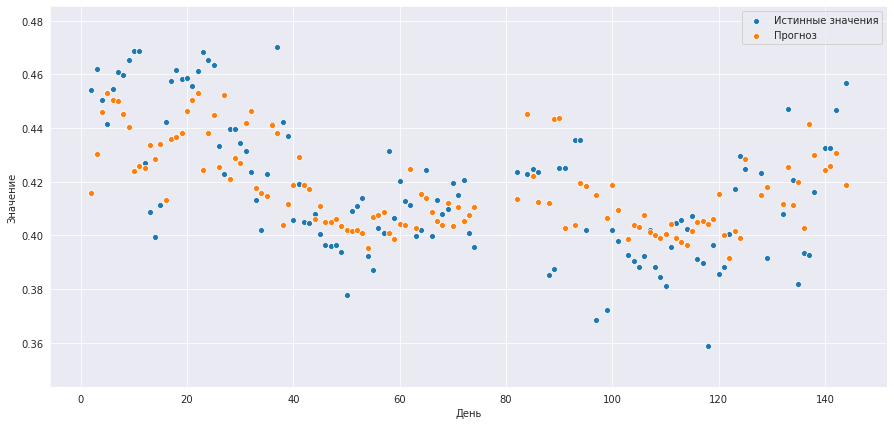

In [26]:
tree = TreeBoosting(1)

days = x3['day_number']
x3.drop(columns=['day_number'], inplace=True)

tree.fit(x3, y3)

y_pred = tree.predict(x3)

plt.figure(figsize=(15,7))
sns.scatterplot(days, y3, label="Истинные значения")
sns.scatterplot(days, y_pred, label='Прогноз')
sns.set_style("darkgrid")
plt.xlabel('День')
_ = plt.ylabel('Значение')

In [32]:
classes = tree.tree.predict(x3)

classes_and_days = np.vstack((classes, days[x3.index]))


classes_and_days[1][classes_and_days[0] == np.max(classes_and_days[0])]

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  14.,  17.,  18.,
        19.,  20.,  21.,  22.,  24.,  25.,  27.,  28.,  29.,  31.,  32.,
        36.,  37.,  62.,  63.,  84.,  89.,  90., 100., 101., 120., 121.,
       125., 133., 134., 135., 137., 138., 140., 141., 142.])

In [13]:
x3.head()

,PhC_mean_3_days,TRIMP1_mean_3_days,TRIMP2_mean_3_days,TRIMP3_mean_3_days,TRIMP4_mean_3_days
35,0.372535,1210.966770,534.391373,1705.116494,1258.114116
36,0.423240,1250.191466,495.574388,1704.549627,1258.606351
37,0.430988,957.759369,178.789358,1402.483608,1063.290216
38,0.460214,946.339431,194.499908,1402.702149,1062.777820
39,0.454231,916.326411,225.537217,1402.339838,1064.446482


In [14]:
print(tree.linears[0].coef_, tree.linears[0].intercept_)
print()
print(tree.linears[1].coef_, tree.linears[1].intercept_)
# print()
# print(tree.linears[2].coef_, tree.linears[2].intercept_)
# print()
# print(tree.linears[3].coef_, tree.linears[3].intercept_)
print()
print(tree.possible_values)

[ 3.65911253e-01 -4.47096602e-06 -1.34070506e-06  1.88178432e-05
 -2.47984188e-05] 0.2609374889522279

[ 2.59873114e-01 -5.40212066e-06 -3.83049902e-05 -3.58725344e-05
  5.63020731e-05] 0.33646545650512505

[0.40931168 0.43366449]


0.2765216064736745


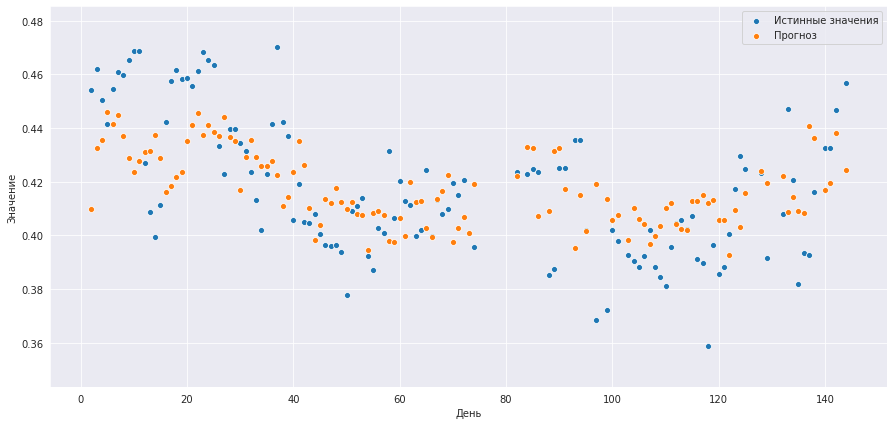

In [15]:
tree = LinearRegression()

x3, y3 = utils.convert_to_3day_mean_format(volkov, add_day_numbers=True)

days = x3['day_number']
x3.drop(columns=['day_number'], inplace=True)

tree.fit(x3, y3)

y_pred = tree.predict(x3)

print(r2_score(y3, y_pred))

plt.figure(figsize=(15,7))
sns.scatterplot(days, y3, label="Истинные значения")
sns.scatterplot(days, y_pred, label='Прогноз')
sns.set_style("darkgrid")
plt.xlabel('День')
_ = plt.ylabel('Значение')

0.43314979962526834


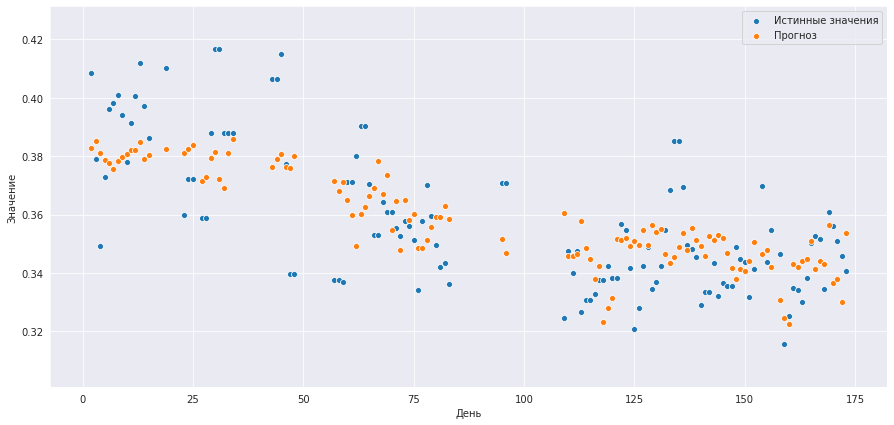

In [16]:
tree = LinearRegression()

x3, y3 = utils.convert_to_3day_mean_format(utils.load_artembev(), add_day_numbers=True)

days = x3['day_number']
x3.drop(columns=['day_number'], inplace=True)

tree.fit(x3, y3)

y_pred = tree.predict(x3)

print(r2_score(y3, y_pred))

plt.figure(figsize=(15,7))
sns.scatterplot(days, y3, label="Истинные значения")
sns.scatterplot(days, y_pred, label='Прогноз')
sns.set_style("darkgrid")
plt.xlabel('День')
_ = plt.ylabel('Значение')